<a href="https://colab.research.google.com/github/wilsonteo00/PortfolioProjects/blob/main/End_of_course_article_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is an Exploratory Data Analysis on the Udemy dataset<br />
Name of dataset: IT & Software Courses Udemy - 22k+ courses<br />
Source of dataset: https://www.kaggle.com/jilkothari/it-software-courses-udemy-22k-courses<br />
<br />
This project will be focusing on answering the following questions:**
1. What makes a course popular in Udemy?
2. Are there any trend in the Udemy over the years?
3. Interesting insights as a learner
4. Interesting insights as a udemy content creator
5. Are we able to predict the number of subscribers effectively?


**Summary**

Setting up the environment
1. Importing the relevant packages
2. Importing data from the file into data frame

**Installing the necessary packages which is not avaliable in google colab**

In [ ]:
#@title
# Install pandas profiling
!pip3 install -I pandas_profiling --quiet

# pycaret is a low code machine learning package
# shap is a package used by pycaret to explain the outputs of a model
!pip3 install pycaret --user --quiet
!pip3 install shap --user --quiet

import warnings
warnings.filterwarnings('ignore')

**Importing the relevant packages**
1. For basic data cleaning operation - Numpy and Pandas
2. For visualisation - Matplotlib, plotly express and seaborn
3. For machine learning - Pycaret regression module

In [1]:
#@title
# Import the relevant packages

# for basic data cleaning operation
import numpy as np
import pandas as pd

# for visualisation
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns

%matplotlib inline
# Adjusts the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (20,16)

# for machine learning
from pycaret.regression import *
# documentation: https://pycaret.readthedocs.io/en/latest/api/regression.html

In [3]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#@title
# Importing data from file

df = pd.read_csv('/content/drive/MyDrive/Udemy end of course article/Udemy_data.csv')

Getting an initial feel of the data
1. Look at the first 5 rows of data
2. Getting indepth information for the data (Data types, number of rows, number of non-null)
3. Identify how much data are missing for each column
4. Look at the number of unique values for each column
5. Looking at the column names

**Taking the first look into our dataset**

In [5]:
#@title
# Initial look at the data

df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


**Understanding the data types of the columns and the number of empty cells**

In [6]:
#@title
# To get more information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22853 non-null  int64  
 1   title                         22853 non-null  object 
 2   url                           22853 non-null  object 
 3   is_paid                       22853 non-null  bool   
 4   num_subscribers               22853 non-null  int64  
 5   avg_rating                    22853 non-null  float64
 6   avg_rating_recent             22853 non-null  float64
 7   rating                        22853 non-null  float64
 8   num_reviews                   22853 non-null  int64  
 9   is_wishlisted                 22853 non-null  bool   
 10  num_published_lectures        22853 non-null  int64  
 11  num_published_practice_tests  22853 non-null  int64  
 12  created                       22853 non-null  object 
 13  p

**Using a for loop to show us the percentage of missing data for each column**

In [7]:
#@title
# To check for missing data
# Perform a loop through the data to get the percentage of completeness

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing,5)}%')

id - 0.0%
title - 0.0%
url - 0.0%
is_paid - 0.0%
num_subscribers - 0.0%
avg_rating - 0.0%
avg_rating_recent - 0.0%
rating - 0.0%
num_reviews - 0.0%
is_wishlisted - 0.0%
num_published_lectures - 0.0%
num_published_practice_tests - 0.0%
created - 0.0%
published_time - 0.0%
discount_price__amount - 0.08003%
discount_price__currency - 0.08003%
discount_price__price_string - 0.08003%
price_detail__amount - 0.02175%
price_detail__currency - 0.02175%
price_detail__price_string - 0.02175%


**Showing the number of unique values in each columns which allows us to decide how to approach the data** 

In [8]:
# Getting the number of unique values for each column

df.nunique()

id                              22853
title                           22750
url                             22853
is_paid                             2
num_subscribers                  6824
avg_rating                       3235
avg_rating_recent               20070
rating                          20070
num_reviews                      1750
is_wishlisted                       1
num_published_lectures            392
num_published_practice_tests        7
created                         22851
published_time                  22846
discount_price__amount             55
discount_price__currency            1
discount_price__price_string       55
price_detail__amount               37
price_detail__currency              1
price_detail__price_string         37
dtype: int64

**Printing out the column names**

In [9]:
# Viewing the column names

df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

After doing the initial observation of the data, there are a few things that need to be done:

1. Rename the column names for clarity.
2. Changing created and published_time into the datetime format.
3. Expanding the datetime column into days, months and years column.
4. Inspect the missing values and decide what to do with it.
5. Add in additional columns for discounted price and price detail in SGD for easier reference. 
6. Drop off currency and price string columns as they are not useful.
7. Drop off wishlisted column as well as it all have one unique value (Not meaningful). 


**Rename the column names and inspect the data**

In [21]:
# Rename columns for clarity

df = df.rename(columns = {'price_detail__amount':'full_price_INR',
                          'discount_price__amount':'discount_price_INR',
                          'published_time':'published_date',
                          'created':'created_date',
                          'num_published_practice_tests':'num_tests',
                          'num_published_lectures':'num_lectures'}) 

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_lectures,num_tests,created_date,published_date,discount_price_INR,discount_price__currency,discount_price__price_string,full_price_INR,price_detail__currency,price_detail__price_string,created_year,created_mth,created_day,published_year,published_mth,published_day,discount_price_SGD,full_price_SGD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14,2016-04-06,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2,14,2016,4,6,8.19,155.52
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22,2016-08-23,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,8,22,2016,8,23,8.19,155.52


**Changing the dates column into datetime format and extract day, month and year for further analysis later**
1. Extract only the yyyy/mm/dd portion from the column
2. Running datetime function then extract the individual day, month and year

In [22]:
# Changing created and published dates into datetime format and extract day,month and year from it

# for created date
df['created_date'] = df.created_date.apply(lambda x: x[:10])
df['created_date'] = pd.to_datetime(df["created_date"],format = '%Y/%m/%d')
df['created_year'] = df.created_date.dt.year
df['created_mth'] = df.created_date.dt.month
df['created_day'] = df.created_date.dt.day

# for published date
df['published_date'] = df.published_date.apply(lambda x: x[:10])
df['published_date'] = pd.to_datetime(df["published_date"],format = '%Y/%m/%d')
df['published_year'] = df.published_date.dt.year
df['published_mth'] = df.published_date.dt.month
df['published_day'] = df.published_date.dt.day

df.info()

TypeError: ignored

**Looking deeper into the missing values and determine what to do with it**
1. Extract out relevant columns for data which has a missing full price column which are meant to be free courses where is_paid column is false.
2. Do the same for data which has a missing full price column which are meant to be paid courses

In [15]:
# Look into the missing values
# Looking into full price being empty and it is a free course

df[df['full_price_INR'].isnull() & (df['is_paid'] == False)][['title','is_paid','discount_price_INR','full_price_INR']].head(5)

,title,is_paid,discount_price_INR,full_price_INR
11484,Stock Market Investing for Beginners,False,NaN,NaN
11485,Introduction to Financial Modeling,False,NaN,NaN
11486,Introduction to Corporate Finance (Mergers & A...,False,NaN,NaN
11487,Learn and Master the Basics of Finance,False,NaN,NaN
11488,Stock Market Foundations,False,NaN,NaN


In [16]:
# Looking into full price being empty but it is a paid course

df[df['full_price_INR'].isnull() & (df['is_paid'] == True)][['title','is_paid','discount_price_INR','full_price_INR']].head(5)

,title,is_paid,discount_price_INR,full_price_INR
13607,Acabou a Previdência e agora? - Volume 03,True,NaN,NaN


**After a quick inspection, we can safely say that all of the courses which has missing prices belongs to the free courses category except for one course which indicate that it is paid but there is no price.** 


**We will proceed to add in zero to these empty fields to avoid errors later on.**
1. Adding in the zeros into missing values
2. Run a check on the columns by calculating number of missing values on discount and full price column, should return (0,0) as output

In [18]:
# To add in zeros for the missing values for discount price and full price

df.discount_price_INR = df.discount_price_INR.fillna(value = 0)
df.full_price_INR = df.full_price_INR.fillna(value = 0)

# To confirm that there is no more empty values in both columns - Should show (0,0) if no missing values

df.discount_price_INR.isnull().sum(), df.full_price_INR.isnull().sum()

(0, 0)

**Creating discount price and full price columns in SGD to get a better sense of the pricing**
1. Use exchange rate for INR to SGD which is 0.018 (As of 8th July 2021)

In [19]:
# To create new columns for discount and full prices in SGD to get a better sense of the pricing.
# Exchange rate for INR to SGD is 0.018 (as of 8th July 2021)

df['discount_price_SGD'] = list(round(df['discount_price_INR']*0.018,2))
df['full_price_SGD'] = list(round(df['full_price_INR']*0.018,2))

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_lectures,num_tests,created_date,published_date,discount_price_INR,discount_price__currency,discount_price__price_string,full_price_INR,price_detail__currency,price_detail__price_string,created_year,created_mth,created_day,published_year,published_mth,published_day,discount_price_SGD,full_price_SGD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14,2016-04-06,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2,14,2016,4,6,8.19,155.52
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22,2016-08-23,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,8,22,2016,8,23,8.19,155.52


**Next we have a quick look on how the course discount price and full price are distributed**
1. For discount price in SGD
2. For full price in SGD

In [90]:
# Showing the number of courses based on different discount price point 

df.discount_price_SGD.value_counts().sort_index()

0.00      1829
8.19     19700
8.32        63
8.42       231
8.53        51
8.64        32
8.66       137
8.78        45
8.89        38
9.00        16
9.13         9
9.25        13
9.36        39
9.47         1
9.59         4
9.72         3
9.83         2
9.94         2
10.08       15
11.00        2
11.52       36
12.60      164
12.96       21
13.32        2
13.68        2
14.40       58
15.84        5
17.28       17
18.72        9
20.16       13
21.60        9
23.04       14
24.48        7
25.92       12
27.36        9
28.80       43
30.24        4
31.68        5
33.12        2
34.56        9
36.00       10
37.44       10
38.88        5
40.32        9
41.76        3
43.20       24
44.64        3
46.08        4
47.52        3
48.96        7
50.40        7
51.84       12
53.28        3
54.72        3
56.16        3
57.60       74
Name: discount_price_SGD, dtype: int64

In [91]:
# Showing the number of courses based on different full price point 

df.full_price_SGD.value_counts().sort_index() 

0.00       497
23.04     5963
28.80     1324
34.56     1209
40.32      751
46.08      762
51.84      360
57.60     1633
63.36      196
69.12      282
74.88      151
80.64      222
86.40      352
92.16      276
97.92      145
103.68     227
109.44     430
115.20    1610
120.96     106
126.72      99
132.48      58
138.24     166
144.00     275
149.76     165
155.52    5187
161.28      98
167.04      43
172.80      64
178.56       4
184.32       9
190.08       3
195.84       2
201.60       5
207.36       7
213.12       6
218.88       4
224.64       9
230.40     153
Name: full_price_SGD, dtype: int64

**We will finish off the cleaning by dropping of columns that are not necessary**
1. Currency cells and the price string cells are repeated values so we can remove. 
2. The wishlist column only has 1 unique value which is False so it is not useful for any analysis.

In [29]:
# Remove currency, price string and wishlisted columns

df = df.drop(['is_wishlisted', 'discount_price__currency','discount_price__price_string',
            'price_detail__currency','price_detail__price_string'],axis=1)

In [30]:
# Review the data information again before starting the analysis and visualisation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  22853 non-null  int64         
 1   title               22853 non-null  object        
 2   url                 22853 non-null  object        
 3   is_paid             22853 non-null  bool          
 4   num_subscribers     22853 non-null  int64         
 5   avg_rating          22853 non-null  float64       
 6   avg_rating_recent   22853 non-null  float64       
 7   rating              22853 non-null  float64       
 8   num_reviews         22853 non-null  int64         
 9   num_lectures        22853 non-null  int64         
 10  num_tests           22853 non-null  int64         
 11  created_date        22853 non-null  datetime64[ns]
 12  published_date      22853 non-null  datetime64[ns]
 13  discount_price_INR  22853 non-null  float64   

**Now we can see that there are no more missing values, we have SGD columns, specific year, month and day for the courses. We can then move on to the analysis portion.**

In [31]:
# View data

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_lectures,num_tests,created_date,published_date,discount_price_INR,full_price_INR,created_year,created_mth,created_day,published_year,published_mth,published_day,discount_price_SGD,full_price_SGD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14,2016-04-06,455.0,8640.0,2016,2,14,2016,4,6,8.19,155.52
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22,2016-08-23,455.0,8640.0,2016,8,22,2016,8,23,8.19,155.52


**1. As someone using Udemy for learning, does higher average rating means higher number of subscribers?**
1. Print out the top 5 courses based on number of subscribers.
2. Print out the top 5 courses based on average rating and number of subscribers.

In [34]:
# Looking at the top 5 courses with the most number of subscribers

df_2 = df.sort_values('num_subscribers', ascending=False).reset_index()
df_2[['id','title','published_date','num_subscribers','avg_rating','num_reviews','num_lectures'
      ,'discount_price_SGD','full_price_SGD']].head(5)

,id,title,published_date,num_subscribers,avg_rating,num_reviews,num_lectures,discount_price_SGD,full_price_SGD
0,362328,AWS Certified Solutions Architect - Associate ...,2015-01-03,564444,4.53732,188941,136,8.19,155.52
1,637930,An Entire MBA in 1 Course:Award Winning Busine...,2016-01-11,374836,4.47080,41630,83,8.19,155.52
2,857010,Learn Ethical Hacking From Scratch,2016-06-20,372902,4.54790,83301,138,8.19,155.52
3,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,2016-04-06,295509,4.66019,78006,84,8.19,155.52
4,437490,The Complete Ethical Hacking Course: Beginner ...,2015-03-19,277382,4.19544,26906,113,8.19,155.52


In [35]:
# Generate out a print statement of the top 5 courses in this dataset

print("Below are the top 5 most subscribed courses in this dataset:")
for i in range(0,6):
    print(f'The course "{df_2.title[i]}" which is published on {df_2.published_year[i]} has {df_2.num_subscribers[i]} subscribers and an average rating of {df_2.avg_rating[i]}.')

Below are the top 5 most subscribed courses in this dataset:
The course "AWS Certified Solutions Architect - Associate 2020" which is published on 2015 has 564444 subscribers and an average rating of 4.53732.
The course "An Entire MBA in 1 Course:Award Winning Business School Prof" which is published on 2016 has 374836 subscribers and an average rating of 4.4708.
The course "Learn Ethical Hacking From Scratch" which is published on 2016 has 372902 subscribers and an average rating of 4.5479.
The course "The Complete SQL Bootcamp 2020: Go from Zero to Hero" which is published on 2016 has 295509 subscribers and an average rating of 4.66019.
The course "The Complete Ethical Hacking Course: Beginner to Advanced!" which is published on 2015 has 277382 subscribers and an average rating of 4.19544.
The course "Stock Market Investing for Beginners" which is published on 2013 has 259888 subscribers and an average rating of 4.34928.


In [36]:
# Looking at the top 5 courses based on average rating and number of subscribers

df_3 = df.sort_values(['avg_rating','num_subscribers','num_reviews'], ascending=False).reset_index()
df_3[['id','title','published_date','num_subscribers','avg_rating','num_reviews','num_lectures'
      ,'discount_price_SGD','full_price_SGD']].head(5)

,id,title,published_date,num_subscribers,avg_rating,num_reviews,num_lectures,discount_price_SGD,full_price_SGD
0,2926552,Not for Profit QuickBooks Desktop vs QuickBook...,2020-04-02,5198,5.0,1,54,8.19,155.52
1,2892636,Xero Not for Profit Organization,2020-03-24,5173,5.0,1,34,8.19,155.52
2,2319342,How to install an Open Source LMS - Part 2,2019-05-06,4115,5.0,26,24,8.19,23.04
3,2596322,Learn Linux commands and Powershell Command in...,2019-10-09,3925,5.0,37,27,8.19,23.04
4,3460818,Python Tutorials - Python Crash Course for Beg...,2020-09-08,3912,5.0,3,23,8.19,23.04


In [37]:
# Generate a print statement based on the top 5 courses based on average rating and number of subscribers

print("Below are the top 5 courses based on highest rating and number of subscribers in this dataset:")
for i in range(0,6):
    print(f'The course "{df_3.title[i]}" which is published on {df_3.published_year[i]} has {df_3.num_subscribers[i]} subscribers and an average rating of {df_3.avg_rating[i]}.')

Below are the top 5 courses based on highest rating and number of subscribers in this dataset:
The course "Not for Profit QuickBooks Desktop vs QuickBooks Online" which is published on 2020 has 5198 subscribers and an average rating of 5.0.
The course "Xero Not for Profit Organization" which is published on 2020 has 5173 subscribers and an average rating of 5.0.
The course "How to install an Open Source LMS - Part 2" which is published on 2019 has 4115 subscribers and an average rating of 5.0.
The course "Learn Linux commands and Powershell Command in the same time" which is published on 2019 has 3925 subscribers and an average rating of 5.0.
The course "Python Tutorials - Python Crash Course for Beginnners" which is published on 2020 has 3912 subscribers and an average rating of 5.0.
The course "Plan and Manage Communications (PMI - PMP)" which is published on 2020 has 3694 subscribers and an average rating of 5.0.


**After comparing the 2 output, we can tell that the highly rated courses which are rated 5 out of 5 does not necessary indicate it is a very popular course. This might be due to the presence of differing opinions which will drag the ratings down to the range of 4.5 out of 5.** 

**Key Findings:<br />
Hence when finding a course, I can focus on sorting by number of subscribers instead of focusing on the ratings as a prefect rating might mean too little number of reviews given to take into account differing opinions.**

**2. Using a heatmap, we can have an idea of the correlation between variables.**


<AxesSubplot:>

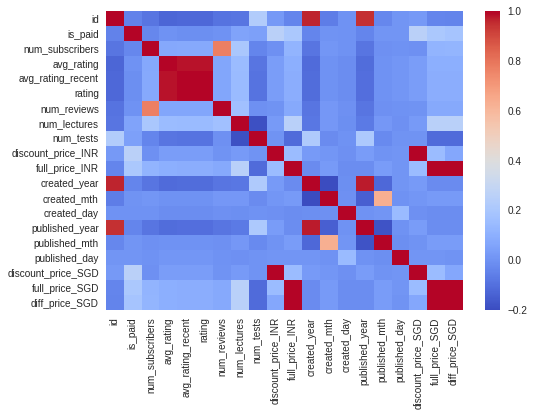

In [79]:
# Using Heatmap to get an idea of the correlation

sns.heatmap(df.corr(),cmap='coolwarm')

**Following a quick glance, we can tell that apart from the duplicated values, number of reviews and number of subscribers are showing quite a strong correlation.**

**Next we can explore whether courses that were published long ago means they will have a better average rating and higher number of subscribers?**
1. Create a heatmap plotting average rating by published month and year.
2. Create a heatmap plotting number of subscribers by published month and year.

<AxesSubplot:xlabel='published_year', ylabel='published_mth'>

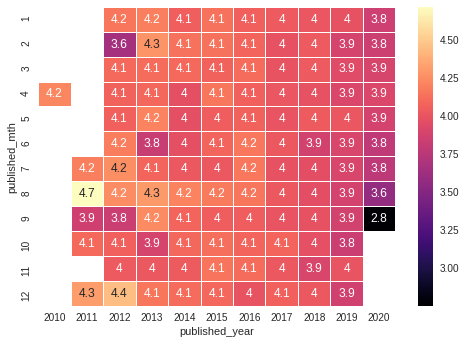

In [80]:
# Does published longer means average rating will be higher?
# Plotting average rating against the month and year which the course is published

rating_pivot = df.pivot_table(values='avg_rating',index='published_mth',columns='published_year', aggfunc=np.mean)
sns.heatmap(rating_pivot,cmap='magma',linecolor='white',linewidths=1, annot=True)

**The heatmap does not have a very clear indication that courses published long ago tend to have a much higher average ratings.**

<AxesSubplot:xlabel='published_year', ylabel='published_mth'>

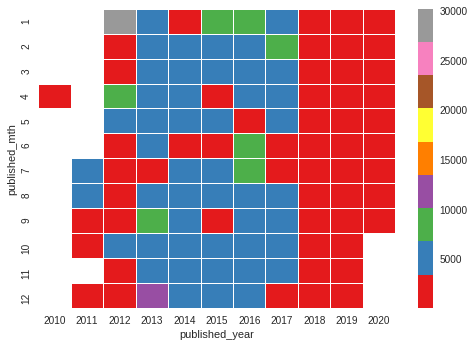

In [78]:
# Does published longer means there will be on average higher number of subscribers?
# Plotting number of subscribers against the month and year which the course is published

subscribers_pivot = df.pivot_table(values='num_subscribers',index='published_mth',columns='published_year', aggfunc=np.mean)
sns.heatmap(subscribers_pivot,cmap='Set1',linecolor='white',linewidths=1)

**The heatmap for the number of subscribers seems to show a clearer trend where the number of subscribers for courses between 2013 to 2017 tends to perform better than those published between 2018 to 2020.<br />
<br />
This indicates that it will take time for courses to gain popularity.**

**3. Turning our focus by comparing the key stats between paid and free courses**

In [33]:
# Comparing the average values based on whether the courses are paid or free

df.groupby('is_paid')['num_subscribers','avg_rating','num_reviews'].mean()

,num_subscribers,avg_rating,num_reviews
is_paid,,,
False,5854.482897,3.959954,308.678068
True,3146.557121,3.952187,269.423868


<AxesSubplot:xlabel='published_year', ylabel='count'>

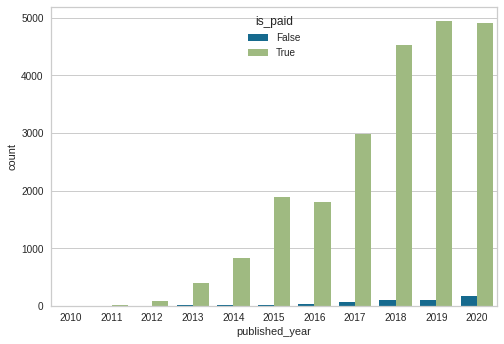

In [74]:
sns.countplot(x='published_year',hue='is_paid',data=df)

**On average, the free courses which means is_paid = False has a higher average number of subscribers, number of reviews and average rating. This however do not have a clear picture as the number of paid courses are still overwhelming more than free courses. Let's dive deeper.**

**Getting a sense of the average rating and the difference between paid and free courses.**
1. Create a boxplot for average rating on all courses.
2. Dive deeper by creating a boxplot splited by year and type of courses.

<AxesSubplot:xlabel='avg_rating'>

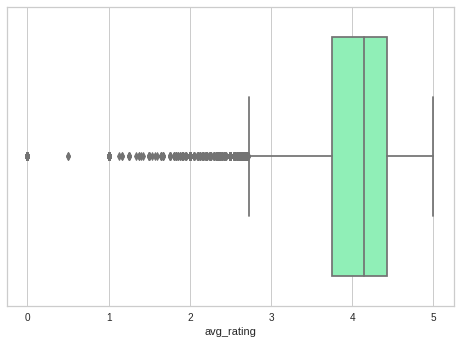

In [82]:
# Boxplot of average rating

sns.boxplot(x="avg_rating",data=df,palette='rainbow')

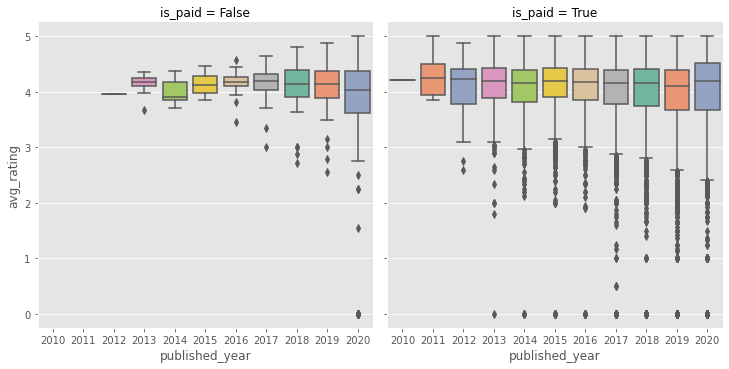

In [43]:
# Boxplot based on published year for average rating split by whether it is paid course

sns.catplot(x="published_year", y="avg_rating", data=df, col="is_paid", kind="box",palette="Set2")

**By breaking down the boxplot into published years and whether it is paid or free courses, we can observe more clearly. In this case, both type of courses are quite consistent with more variance in the free courses but that could be due to the lower number of free courses.** 

**We can then repeat the same steps to look into the number of subscribers**
1. Create a boxplot for number of subscribers on all courses.
2. Dive deeper by creating a boxplot splited by year and type of courses.

<AxesSubplot:xlabel='num_subscribers'>

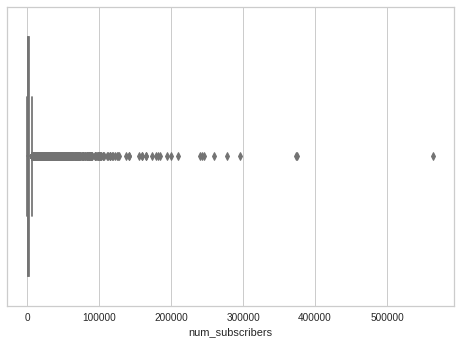

In [85]:
# Boxplot of number of subscribers

sns.boxplot(x="num_subscribers",data=df,palette='rainbow')

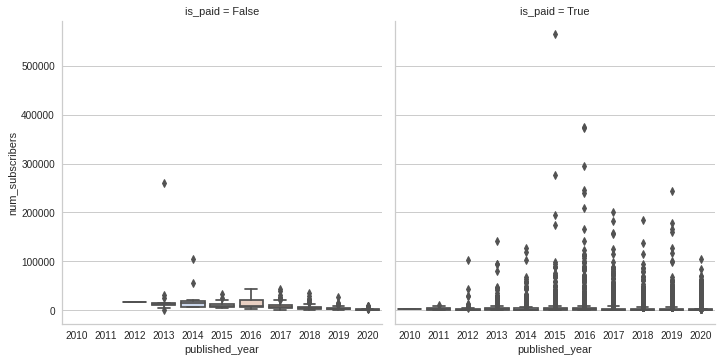

In [84]:
# Boxplot based on published year for number of subscribers split by whether it is paid course

sns.catplot(x="published_year", y="num_subscribers", data=df, col="is_paid", kind="box",palette="coolwarm")

**In this case, we can observe that most courses has lesser than 100 thousands subscribers with a rare course achieving above 500 thousands courses.** 

**Key findings:<br />
As someone looking for courses in Udemy, this provides me with a greater clarity to deem the average score for courses as approx 4.2 rather than the 2.5 suggested by the scoring scale.<br />
<br />
As a content creater in Udemy, this shows that the number of subscribers for most courses tend to be in the range of thousands rather than hundred of thousands.**

**4. The last area to focus is on the pricing of the courses and the effect that it might have on other variables.**

**We shall start with visualising the distribution of the prices for both discount and full prices of the course.**

<AxesSubplot:xlabel='full_price_SGD', ylabel='Count'>

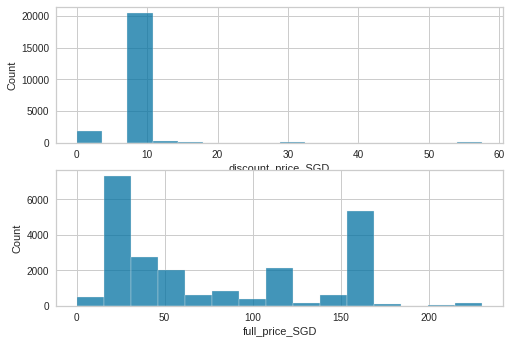

In [92]:
## Getting a sense of how the courses are priced

fig = plt.figure

# 2 rows, 1 cols - 2 charts
plt.subplot(2,1,1)
sns.histplot(df.discount_price_SGD)

plt.subplot(2,1,2)
sns.histplot(df.full_price_SGD,bins=15)

**After knowing the distribution, we can plot it against the number of subscribers and further differentiated by number of reviews and published year.**

<AxesSubplot:xlabel='discount_price_SGD', ylabel='num_subscribers'>

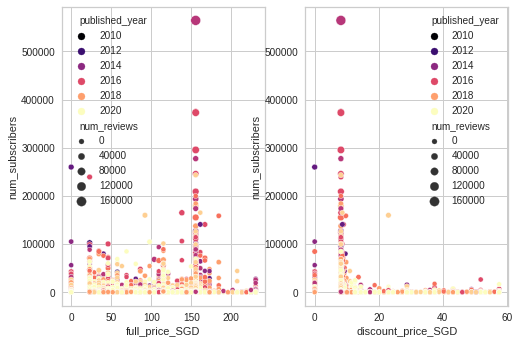

In [103]:
## Getting a sense of how the courses are priced

fig = plt.figure.figsize = (80,40)

# 1 rows, 2 cols - 2 charts
plt.subplot(1,2,1)
sns.scatterplot(x='full_price_SGD',y='num_subscribers',size='num_reviews', hue='published_year', data=df, palette='magma')

plt.subplot(1,2,2)
sns.scatterplot(x='discount_price_SGD',y='num_subscribers',size='num_reviews', hue='published_year', data=df, palette='magma')

**We can see that the range of full price for the courses are more diversed while the discounted prices tend to follow a clearer trend where courses that has the most subscribers follow a particular price point of 8.19 SGD equivalent.**

**We can create a new variable by getting the difference between full price and discount price. The perceived price discount gives a sense of bargin hence it will be interesting to see whether there are differences in the graph.** 

In [98]:
df['diff_price_SGD'] = df.full_price_SGD - df.discount_price_SGD

<AxesSubplot:xlabel='diff_price_SGD', ylabel='num_subscribers'>

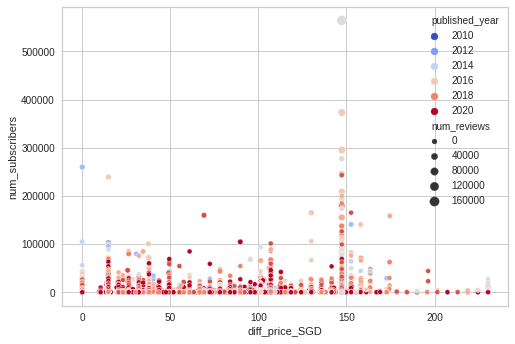

In [99]:
# Plotting the various elements together

sns.scatterplot(x='diff_price_SGD',y='num_subscribers',size='num_reviews',hue='published_year', data=df,palette='coolwarm')

<AxesSubplot:xlabel='diff_price_SGD', ylabel='num_subscribers'>

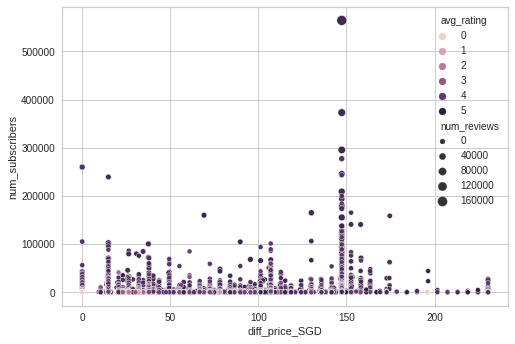

In [102]:
# Plotting the various elements together

sns.scatterplot(x='diff_price_SGD',y='num_subscribers',size='num_reviews',hue='avg_rating', data=df)

**We can observed that the optimal 'price premium' is approx SGD 150 equivalent where the most consistent amount of courses that achieved above 100 thousands subscribers.**

**Key Findings: <br />
For Udemy course creater, they can do a reverse calculation to determine their full price based on their desired 'discounted' price. By adding approx SGD 150 equivalent onto the desired 'discounted' price, it seems to gives the best perceived of values for people looking for course to learn.**

Analysis:
1. Sorting by number of subscribers vs average ratings
2. Correlation and trend for variables (Heatmap)
3. Focus on Paid vs Free course (Box plot) 
4. Focus on pricing and the effects on other variables (Scatterplot)
7. Looking at whether other factors affect the number of subscribers (Scatterplot)


**5. Looking into other factors like number of lectures and average ratings.**

<AxesSubplot:xlabel='discount_price_SGD', ylabel='num_subscribers'>

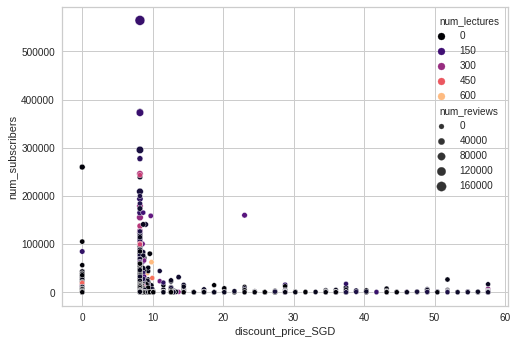

In [104]:
# Plotting the various elements together

sns.scatterplot(x='discount_price_SGD',y='num_subscribers',size='num_reviews', hue='num_lectures', data=df, palette='magma')

**No clear trend between the popular courses and the number of lectures in the courses.**

<AxesSubplot:xlabel='avg_rating', ylabel='num_subscribers'>

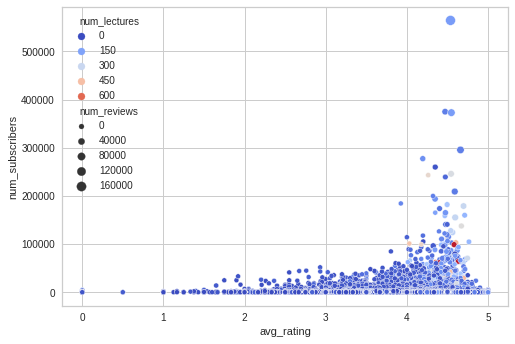

In [105]:
# Plotting the various elements together

sns.scatterplot(x='avg_rating',y='num_subscribers',size='num_reviews',hue='num_lectures', data=df,palette='coolwarm')

**Most popular courses has an average rating of approx 4.5 while any courses that has a rating below 4 highly likely will not perform very well.**

**Key Findings: <br />
As a course creator in Udemy, average rating is cruical hence there is a need to interact with the learners to ensure that the number of negative ratings does not pull the overall ratings down below 4.**

<AxesSubplot:xlabel='avg_rating', ylabel='num_lectures'>

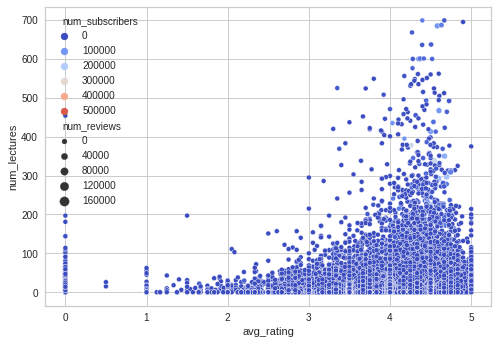

In [106]:
sns.scatterplot(x='avg_rating',y='num_lectures',size='num_reviews',hue='num_subscribers', data=df,palette='coolwarm')

**No clear trend between number of lectures and the average ratings although as the number of lectures increases, the courses tend to stay within the 4 to 5 range. It might be due the amount of effort that course creator placed in that has some impact.<br /> 
Overall no clear trend to get meaningful insights.**

<AxesSubplot:xlabel='avg_rating', ylabel='num_subscribers'>

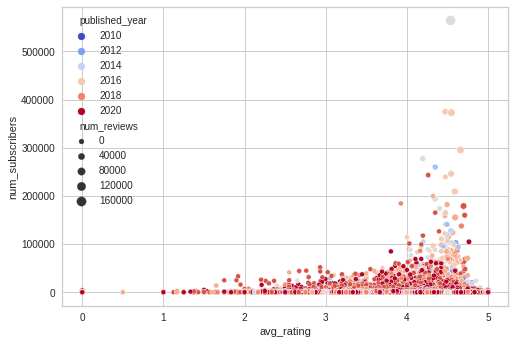

In [107]:
# Plotting the various elements together

sns.scatterplot(x='avg_rating',y='num_subscribers',size='num_reviews',hue='published_year', data=df,palette='coolwarm')

**The courses that was published in 2016 seems to have a higher ratings and higher number of subscribers. <br />
This will be something interesting for me when looking for courses to learn in Udemy to pay additional attentions to courses published on 2016.**

**1. Preparing the dataset for machine learning**

**Separate out the categorical variables from numerical variables**

In [60]:
# separating the categorical variables from the numerical variables

# get list of columns that are numerical
num_vars = df.describe().columns

# get dataset of categorical columns
cat_vars = [c for c in df.columns if c not in num_vars]

# describing categorical variables will give you different output
df[cat_vars].describe()

,title,url,is_paid,created_date,published_date
count,22853,22853,22853,22853,22853
unique,22750,22853,2,2754,2603
top,AWS Certified Solutions Architect Associate Pr...,/course/the-complete-sql-bootcamp/,True,2020-04-17 00:00:00,2017-09-13 00:00:00
freq,5,1,22356,79,55
first,NaN,NaN,NaN,2010-04-14 00:00:00,2010-04-14 00:00:00
last,NaN,NaN,NaN,2020-09-09 00:00:00,2020-09-10 00:00:00


**Inspect the data again**

In [108]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'num_lectures',
       'num_tests', 'created_date', 'published_date', 'discount_price_INR',
       'full_price_INR', 'created_year', 'created_mth', 'created_day',
       'published_year', 'published_mth', 'published_day',
       'discount_price_SGD', 'full_price_SGD', 'diff_price_SGD'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  22853 non-null  int64         
 1   title               22853 non-null  object        
 2   url                 22853 non-null  object        
 3   is_paid             22853 non-null  bool          
 4   num_subscribers     22853 non-null  int64         
 5   avg_rating          22853 non-null  float64       
 6   avg_rating_recent   22853 non-null  float64       
 7   rating              22853 non-null  float64       
 8   num_reviews         22853 non-null  int64         
 9   num_lectures        22853 non-null  int64         
 10  num_tests           22853 non-null  int64         
 11  created_date        22853 non-null  datetime64[ns]
 12  published_date      22853 non-null  datetime64[ns]
 13  discount_price_INR  22853 non-null  float64   

**Identify the variables that we are removing when performing the machine learning**

Check which variables do we want to remove first
* is_paid - True or False, to determine whether a course is paid or not
* Number of subscribers - This is our outcome variable
* Average rating - useful
* Number of reviews - useful
* Number of lectures - could be useful
* Number of tests - could be useful
* Published date - could be useful
* Published day - could be useful
* Published month - could be useful
* Published year - could be useful
* Discount price SGD - could be useful
* Full price SGD - could be useful
* Difference in price SGD - could be useful
* Percentage of reviews - could be useful
<br />
<br />
* id - This is the course ID (To be removed)
* title - Name of the course (To be removed)
* url - Website link to the course (To be removed)
* Average rating recent - Overlap with average rating (To be removed)
* Rating - Overlap with average rating (To be removed)
* Created date - Will use published date instead (To be removed)
* Created day - Will use published date instead (To be removed)
* Created month - Will use published date instead (To be removed)
* Created year - Will use published date instead (To be removed)
* Discount price INR - Will use SGD price instead (To be removed)
* Full price INR - Will use SGD price instead (To be removed)


Machine Learning
1. Preparing the data for machine learning
2. Setting up the machine learning model
3. Running the model and evaluate the results.
4. Finetune the model by changing the perimeters within the model. 



**Setting up the machine learning model to predict number of subscribers**

In [150]:
# Setting up model

# https://pycaret.readthedocs.io/en/latest/api/regression.html

model = setup(
    data=df,
    target='num_subscribers',
    categorical_features=cat_vars,
    ignore_features=['id', 'title', 'url', 'avg_rating_recent', 'rating',
                     'created_date', 'created_year', 'created_mth', 'created_day',
                     'discount_price_INR', 'full_price_INR','published_date'
                    ],
    #polynomial_features=True,
    #polynomial_degree=2,
    remove_outliers=True,
    #outliers_threshold=0.05,
    #pca=True,
    #pca_method='linear',
    #pca_components=2,
    normalize = True,
    normalize_method = 'zscore',
    #create_clusters=True,
    silent = True
)

print("Model setup completed")

,Description,Value
0,session_id,2924
1,Target,num_subscribers
2,Original Data,"(22853, 24)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15197, 33)"


Model setup completed


**Next we shall compare the different machine learning models**

In [153]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2336.7518,3.464532e+07,5768.5317,0.4077,1.7736,6.4819,6.344
lightgbm,Light Gradient Boosting Machine,2260.2415,3.460483e+07,5768.4649,0.4061,1.8732,8.6426,0.152
gbr,Gradient Boosting Regressor,2346.2951,3.498329e+07,5819.6571,0.3930,2.0325,13.2229,1.221
et,Extra Trees Regressor,2345.2998,3.690580e+07,5982.4094,0.3550,1.7479,6.5499,5.495
br,Bayesian Ridge,2639.0769,3.748106e+07,6055.4680,0.3336,2.5499,41.7014,0.030
lasso,Lasso Regression,2637.7968,3.747627e+07,6055.3364,0.3335,2.5489,41.5816,0.020
lr,Linear Regression,2638.7894,3.748055e+07,6055.7459,0.3334,2.5486,41.7370,0.029
ridge,Ridge Regression,2638.8726,3.748029e+07,6055.6824,0.3334,2.5488,41.7363,0.026
lar,Least Angle Regression,2638.8888,3.747952e+07,6055.6578,0.3334,2.5486,41.7493,0.031
llar,Lasso Least Angle Regression,2628.9459,3.754806e+07,6058.9879,0.3334,2.5740,38.9554,0.028


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2924, verbose=0, warm_start=False)

**After testing out different machine learning models, select the best model and optimize it further**

In [151]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2895.3977,7.641627e+07,8741.6400,-0.2224,1.8915,7.4734
1,2833.9309,5.801955e+07,7617.0562,-0.0209,1.8459,6.5036
2,2703.5263,5.039235e+07,7098.7572,0.1087,1.8668,6.0202
3,2665.5497,5.326035e+07,7297.9687,-0.0378,1.8686,6.7827
4,2752.8168,4.636404e+07,6809.1145,-0.1339,1.8908,6.3450
5,3017.5704,9.745319e+07,9871.8382,0.2024,1.8477,6.1318
6,2862.3382,4.483664e+07,6696.0170,-0.0537,1.9303,6.5937
7,2917.4078,5.382528e+07,7336.5711,-0.7715,1.9332,6.9729
8,3012.0362,6.332995e+07,7958.0118,0.1095,1.9726,7.0137
9,2929.0026,6.001087e+07,7746.6685,-0.2263,1.8771,6.3282


In [152]:
tuned_dt = tune_model(dt, optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2061.7576,4.465917e+07,6682.7515,0.2856,1.4697,1.1820
1,2014.4970,3.578721e+07,5982.2412,0.3703,1.4630,1.1084
2,1893.1030,4.360085e+07,6603.0939,0.2288,1.5035,1.1726
3,1899.2780,3.222532e+07,5676.7354,0.3720,1.4819,1.1030
4,1901.1293,3.239488e+07,5691.6503,0.2077,1.4609,1.1135
5,2218.4339,7.721736e+07,8787.3411,0.3680,1.4848,1.1554
6,2007.9273,4.053909e+07,6367.0318,0.0473,1.5352,1.3311
7,1906.7298,2.456264e+07,4956.0706,0.1916,1.5401,1.4099
8,2181.0533,5.456591e+07,7386.8743,0.2327,1.5638,1.1700
9,2064.1406,3.914146e+07,6256.3134,0.2002,1.4752,1.1367


**After optimising the model, it provides a much better MAPE of 1.1883 compared to MAPE of 6.6165 before optimising.**

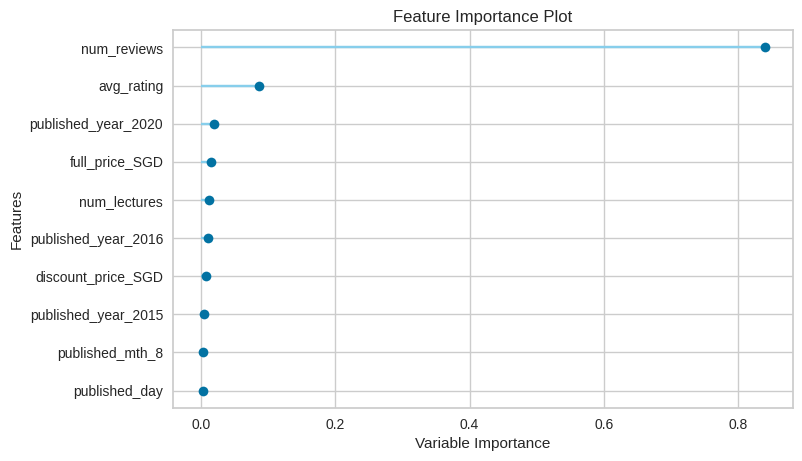

In [154]:
plot_model(tuned_dt, plot='feature')

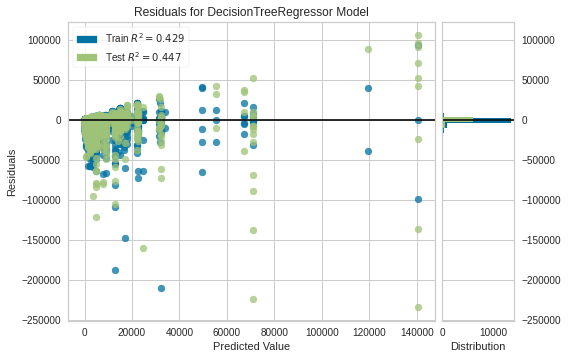

In [155]:
plot_model(tuned_dt)

**In the end, the model is not very effective in predicting the number of subscribers although it will be able to give a good enough estimate.**